<H1>Task 04 – Geospatial Application for Naadhagama Music Concert<H1>

In [1]:
# Install these libraries if you don't have them already
"""
!pip install pandas
!pip install numpy
!pip install geopandas
!pip install matplotlib
!pip install seaborn
!pip install geopy
!pip install dash
!pip install plotly
!pip install folium
!pip install scikit-learn
!pip install statsmodels
"""

'\n!pip install pandas\n!pip install numpy\n!pip install geopandas\n!pip install matplotlib\n!pip install seaborn\n!pip install geopy\n!pip install dash\n!pip install plotly\n!pip install folium\n!pip install scikit-learn\n!pip install statsmodels\n'

In [2]:
# Required Python Libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from geopy.geocoders import Nominatim
import dash
from dash import dcc, html
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart

<H2>Read the Instagram Posts Data File</H2>

This data files contains the Instagram posts data of 'Naadhagama' music concert.

In [3]:
# Specify the CSV file path to read
csv_file_path = 'instagram_post_data.csv'

# Read the CSV file into a pandas DataFrame
naadhagama_df = pd.read_csv(csv_file_path)

# Define the column name mapping from the CSV file to the DataFrame
column_mapping = {
    'id': 'post_id',
    'caption': 'caption',
    'ownerId': 'user_id',
    'ownerFullName': 'user_full_name',
    'ownerUsername': 'user_name',
    'userLocation': 'user_location',
    'url': 'url',
    'commentsCount': 'comments_count',
    'likesCount': 'likes_count',
    'timestamp': 'timestamp',
    'hashtags': 'hashtags'
}

# Rename columns based on the mapping defined above
naadhagama_df.rename(columns=column_mapping, inplace=True)

naadhagama_df.info()
naadhagama_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481 entries, 0 to 1480
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   post_id         1481 non-null   float64
 1   caption         1481 non-null   object 
 2   user_id         1481 non-null   int64  
 3   user_full_name  1475 non-null   object 
 4   user_name       1481 non-null   object 
 5   user_location   919 non-null    object 
 6   url             1481 non-null   object 
 7   comments_count  1481 non-null   int64  
 8   likes_count     1481 non-null   int64  
 9   timestamp       1481 non-null   object 
 10  hashtags        1481 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 127.4+ KB


,post_id,caption,user_id,user_full_name,user_name,user_location,url,comments_count,likes_count,timestamp,hashtags
0,3.240240e+18,දෑත දරා... ✨\n\nSorry for mistakes 🙏\n\nUse 🎧❤...,8748032779,Ranahansi Ayagamage,_ranahansi_ayagamage_,Polgolla,https://www.instagram.com/p/Cz3pGPxLNvo/,0,1,2023-11-20T13:23:57.000Z,"['flutemusic', 'shortsvideos', 'flutecover', '..."
1,3.236110e+18,A real life doll beautiful @ruvini_seresinhe 💗...,276825450,Makeup Artist,mystique_by_anu,Tholangamuwa,https://www.instagram.com/p/Czo-GCJBmFF/,3,116,2023-11-14T20:38:47.000Z,"['nadagama2023', 'naturalbeauty', 'melbournemua']"
2,3.228640e+18,කවුද පැරදි මම දින්නා.. 😎\n\n#dinna #naadhagama...,3658355322,D I N N A,dinesh_gamage_,Colombo,https://www.instagram.com/p/CzOavW4ogft/,27,10556,2023-11-04T13:09:36.000Z,"['dinna', 'naadhagama', 'perth', 'attitude😎', ..."
3,3.228470e+18,🥶❄️\n#naadhagama #perth #dhanithsri #dhanithsr...,3673315246,Dhanith Sri,dhanithsriofficial,Colombo,https://www.instagram.com/p/CzN0P0vp9gE/,23,3080,2023-11-04T07:33:14.000Z,"['naadhagama', 'perth', 'dhanithsri', 'dhanith..."
4,3.227870e+18,"As the sun sets, her soul aligns with the natu...",1973939377,Kanchana Anuradhi,kanchanaanuradhi,Colombo,https://www.instagram.com/p/CzLr-1SpG1h/,129,19968,2023-11-03T11:42:32.000Z,"['kanchanaanuradhi', 'deegamage', 'mystiquebya..."


<H2>Data Pre-processing</H2>

<H4>Remove the Duplicate Posts</H4>

The duplicated posts are identified and removed based on the 'post_id'.

In [4]:
# Sort the DataFrame by 'timestamp' in descending order
naadhagama_df.sort_values(by='timestamp', ascending=False, inplace=True)

# Remove duplicated records based on 'post_id'
naadhagama_df = naadhagama_df.drop_duplicates(subset='post_id', keep='first')
naadhagama_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1323 entries, 0 to 1480
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   post_id         1323 non-null   float64
 1   caption         1323 non-null   object 
 2   user_id         1323 non-null   int64  
 3   user_full_name  1317 non-null   object 
 4   user_name       1323 non-null   object 
 5   user_location   832 non-null    object 
 6   url             1323 non-null   object 
 7   comments_count  1323 non-null   int64  
 8   likes_count     1323 non-null   int64  
 9   timestamp       1323 non-null   object 
 10  hashtags        1323 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 124.0+ KB


<H4>Clean the caption column</H4>

Cleans the 'caption' column by removing unnecessary characters and converting to lowercase.

In [5]:
# Remove unnecessary characters and convert to lowercase  
naadhagama_df['caption'] = naadhagama_df['caption'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', str(x)).lower())

naadhagama_df.info()
naadhagama_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1323 entries, 0 to 1480
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   post_id         1323 non-null   float64
 1   caption         1323 non-null   object 
 2   user_id         1323 non-null   int64  
 3   user_full_name  1317 non-null   object 
 4   user_name       1323 non-null   object 
 5   user_location   832 non-null    object 
 6   url             1323 non-null   object 
 7   comments_count  1323 non-null   int64  
 8   likes_count     1323 non-null   int64  
 9   timestamp       1323 non-null   object 
 10  hashtags        1323 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 124.0+ KB


,post_id,caption,user_id,user_full_name,user_name,user_location,url,comments_count,likes_count,timestamp,hashtags
0,3.240240e+18,\n\nsorry for mistakes \n\nuse \n\nflutemusi...,8748032779,Ranahansi Ayagamage,_ranahansi_ayagamage_,Polgolla,https://www.instagram.com/p/Cz3pGPxLNvo/,0,1,2023-11-20T13:23:57.000Z,"['flutemusic', 'shortsvideos', 'flutecover', '..."
1,3.236110e+18,a real life doll beautiful ruviniseresinhe \n\...,276825450,Makeup Artist,mystique_by_anu,Tholangamuwa,https://www.instagram.com/p/Czo-GCJBmFF/,3,116,2023-11-14T20:38:47.000Z,"['nadagama2023', 'naturalbeauty', 'melbournemua']"
2,3.228640e+18,\n\ndinna naadhagama perth attitude selflove,3658355322,D I N N A,dinesh_gamage_,Colombo,https://www.instagram.com/p/CzOavW4ogft/,27,10556,2023-11-04T13:09:36.000Z,"['dinna', 'naadhagama', 'perth', 'attitude😎', ..."
3,3.228470e+18,\nnaadhagama perth dhanithsri dhanithsriofficial,3673315246,Dhanith Sri,dhanithsriofficial,Colombo,https://www.instagram.com/p/CzN0P0vp9gE/,23,3080,2023-11-04T07:33:14.000Z,"['naadhagama', 'perth', 'dhanithsri', 'dhanith..."
4,3.227870e+18,as the sun sets her soul aligns with the natur...,1973939377,Kanchana Anuradhi,kanchanaanuradhi,Colombo,https://www.instagram.com/p/CzLr-1SpG1h/,129,19968,2023-11-03T11:42:32.000Z,"['kanchanaanuradhi', 'deegamage', 'mystiquebya..."


<H4>Remove the Posts related to Events that happen on the Overseas.</H4>

Some Naadhagama Events have happened in Australia. 

Identify those event posts based on the captions and hashtags and remove them from the dataset.

In [6]:
# Remove records related to captions and hashtags related to overseas locations

words_to_remove = ['melbourne', 'perth', 'australia', 'brisbane']

# Remove rows based on specified words in 'caption' and 'hashtags' columns
for word in words_to_remove:
    naadhagama_df = naadhagama_df[~naadhagama_df['caption'].str.contains(word, case=False)]
    naadhagama_df = naadhagama_df[~naadhagama_df['hashtags'].str.contains(word, case=False)]

# naadhagama_df = naadhagama_df.query('~hashtags.str.contains("perth|melbourne|australia")', engine='python')
naadhagama_df.info()
naadhagama_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1246 entries, 0 to 1480
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   post_id         1246 non-null   float64
 1   caption         1246 non-null   object 
 2   user_id         1246 non-null   int64  
 3   user_full_name  1243 non-null   object 
 4   user_name       1246 non-null   object 
 5   user_location   787 non-null    object 
 6   url             1246 non-null   object 
 7   comments_count  1246 non-null   int64  
 8   likes_count     1246 non-null   int64  
 9   timestamp       1246 non-null   object 
 10  hashtags        1246 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 116.8+ KB


,post_id,caption,user_id,user_full_name,user_name,user_location,url,comments_count,likes_count,timestamp,hashtags
0,3.240240e+18,\n\nsorry for mistakes \n\nuse \n\nflutemusi...,8748032779,Ranahansi Ayagamage,_ranahansi_ayagamage_,Polgolla,https://www.instagram.com/p/Cz3pGPxLNvo/,0,1,2023-11-20T13:23:57.000Z,"['flutemusic', 'shortsvideos', 'flutecover', '..."
8,3.224350e+18,thank you for the music\n\n\n\nnaadhagama crys...,58295152982,Akhila Pathirana,flipped_orb,Galle,https://www.instagram.com/p/Cy_MnTfp6av/,2,8,2023-10-29T15:17:33.000Z,"['naadhagama', 'crystalballphotography', 'lens..."
11,3.224020e+18,naadhagama,1454974691,Erandi Wijerathne,erandi_0330,Kandy,https://www.instagram.com/p/Cy-BgONPLWe/,4,106,2023-10-29T04:21:14.000Z,['naadhagama']
13,3.223810e+18,naadhagama,3043670855,Sachith Palipane,sdp119,Kandy,https://www.instagram.com/p/Cy9Qz6jBVHF/,1,10,2023-10-28T21:15:45.000Z,['naadhagama']
16,3.222880e+18,nadagama \n\n\n\nnadagama instagram instagood ...,47937756411,Ravishka Karunarathne,_.ravishka._r,Beliatta,https://www.instagram.com/p/Cy5-8KqJBk_/,14,230,2023-10-27T14:41:52.000Z,"['nadagama', 'instagram', 'instagood', 'nighto..."


<H3>Missing Value Treatment</H3>

<H4>User Location Field Imputation</H4>

The random Imputation method is used to impute the 'user_location' column.

In [7]:
# Replace missing values in 'user_location' with a random choice from non-null values in the same column
naadhagama_df['user_location'] = naadhagama_df['user_location'].fillna(
    pd.Series(np.random.choice(naadhagama_df['user_location'].dropna(), size=len(naadhagama_df))))

naadhagama_df.info()
naadhagama_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1246 entries, 0 to 1480
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   post_id         1246 non-null   float64
 1   caption         1246 non-null   object 
 2   user_id         1246 non-null   int64  
 3   user_full_name  1243 non-null   object 
 4   user_name       1246 non-null   object 
 5   user_location   1179 non-null   object 
 6   url             1246 non-null   object 
 7   comments_count  1246 non-null   int64  
 8   likes_count     1246 non-null   int64  
 9   timestamp       1246 non-null   object 
 10  hashtags        1246 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 116.8+ KB


,post_id,caption,user_id,user_full_name,user_name,user_location,url,comments_count,likes_count,timestamp,hashtags
0,3.240240e+18,\n\nsorry for mistakes \n\nuse \n\nflutemusi...,8748032779,Ranahansi Ayagamage,_ranahansi_ayagamage_,Polgolla,https://www.instagram.com/p/Cz3pGPxLNvo/,0,1,2023-11-20T13:23:57.000Z,"['flutemusic', 'shortsvideos', 'flutecover', '..."
8,3.224350e+18,thank you for the music\n\n\n\nnaadhagama crys...,58295152982,Akhila Pathirana,flipped_orb,Galle,https://www.instagram.com/p/Cy_MnTfp6av/,2,8,2023-10-29T15:17:33.000Z,"['naadhagama', 'crystalballphotography', 'lens..."
11,3.224020e+18,naadhagama,1454974691,Erandi Wijerathne,erandi_0330,Kandy,https://www.instagram.com/p/Cy-BgONPLWe/,4,106,2023-10-29T04:21:14.000Z,['naadhagama']
13,3.223810e+18,naadhagama,3043670855,Sachith Palipane,sdp119,Kandy,https://www.instagram.com/p/Cy9Qz6jBVHF/,1,10,2023-10-28T21:15:45.000Z,['naadhagama']
16,3.222880e+18,nadagama \n\n\n\nnadagama instagram instagood ...,47937756411,Ravishka Karunarathne,_.ravishka._r,Beliatta,https://www.instagram.com/p/Cy5-8KqJBk_/,14,230,2023-10-27T14:41:52.000Z,"['nadagama', 'instagram', 'instagood', 'nighto..."


<H4>Remove the records that having null values for User Location Field</H4>

In [8]:
# Drop records where 'user_location' is null
naadhagama_df = naadhagama_df.dropna(subset=['user_location'])
naadhagama_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1179 entries, 0 to 1480
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   post_id         1179 non-null   float64
 1   caption         1179 non-null   object 
 2   user_id         1179 non-null   int64  
 3   user_full_name  1176 non-null   object 
 4   user_name       1179 non-null   object 
 5   user_location   1179 non-null   object 
 6   url             1179 non-null   object 
 7   comments_count  1179 non-null   int64  
 8   likes_count     1179 non-null   int64  
 9   timestamp       1179 non-null   object 
 10  hashtags        1179 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 110.5+ KB


<H3>Geo-coordinates Identification</H3>

The Geopy library is used to obtain the geo-coordinates for the user locations.

In [9]:
# Add user_country column to the DataFrame with value 'Sri Lanka'
naadhagama_df['user_country'] = 'Sri Lanka'

# Define a function to get coordinates from location and country
def get_coordinates(location, country): 
    try:
        # Combine location and country for geocoding query
        location_query = f"{location}, {country}"

        # Use Nominatim geocoder to get coordinates of location
        geolocator = Nominatim(user_agent="geo_coordinates_finder")
        location_info = geolocator.geocode(location_query)

        # Extract latitude and longitude from location_info
        if location_info:
            latitude, longitude = location_info.latitude, location_info.longitude
            return latitude, longitude
        else:
            # Return None if coordinates are not found
            print(f"Coordinates not found for {location_query}")
            return None, None

    except Exception as e:
        # Handle other exceptions 
        print(f"An error occurred: {e}")
        return None, None

# Get distinct combinations of 'user_location' and 'user_country' from the DataFrame
distinct_locations = naadhagama_df[['user_location', 'user_country']].drop_duplicates()

# Create a list to store dictionaries of coordinates 
coordinates_list = []

# Iterate over distinct locations and get coordinates 
for index, row in distinct_locations.iterrows():
    latitude, longitude = get_coordinates(row['user_location'], row['user_country'])
    coordinates_list.append({
        'user_location': row['user_location'],
        'user_country': row['user_country'],
        'latitude': latitude,
        'longitude': longitude
    })

# Convert the list of dictionaries to a DataFrame 
coordinates_df = pd.DataFrame(coordinates_list)

# Merge the coordinates back into the main DataFrame 
naadhagama_df = pd.merge(naadhagama_df, coordinates_df, on=['user_location', 'user_country'], how='left')

naadhagama_df.info()

# Drop records where 'latitude' and 'longitude' are null
naadhagama_df = naadhagama_df.dropna(subset=['latitude', 'longitude'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179 entries, 0 to 1178
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   post_id         1179 non-null   float64
 1   caption         1179 non-null   object 
 2   user_id         1179 non-null   int64  
 3   user_full_name  1176 non-null   object 
 4   user_name       1179 non-null   object 
 5   user_location   1179 non-null   object 
 6   url             1179 non-null   object 
 7   comments_count  1179 non-null   int64  
 8   likes_count     1179 non-null   int64  
 9   timestamp       1179 non-null   object 
 10  hashtags        1179 non-null   object 
 11  user_country    1179 non-null   object 
 12  latitude        1179 non-null   float64
 13  longitude       1179 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 129.1+ KB


<H3>Identify the District of the Users</H3>

Geopy library is used to obtain the district of the user locations.

The district is identified by using the geo-coordinates of each location.

In [10]:
# Define a function to get district from coordinates
def get_district_from_coordinates(latitude, longitude):
    geolocator = Nominatim(user_agent="district_locator")
    location = geolocator.reverse((latitude, longitude), language="en")

    if location and location.raw.get("address"):
        address = location.raw["address"]
        district = address.get("state_district")
        if district:
            return district
    else:
        print(f"Error: District not found for coordinates ({latitude}, {longitude})")
        return None

unique_coordinates_df = naadhagama_df[['latitude', 'longitude']].drop_duplicates()
# Apply the function to each row in the DataFrame
unique_coordinates_df['user_district'] = unique_coordinates_df.apply(lambda row: get_district_from_coordinates(row['latitude'], row['longitude']), axis=1)

# Merge the districts back into the main DataFrame
naadhagama_df = pd.merge(naadhagama_df, unique_coordinates_df[['latitude', 'longitude', 'user_district']], on=['latitude', 'longitude'], how='left')

# Drop records where 'userDistrict' is None
naadhagama_df = naadhagama_df.dropna(subset=['user_district'])

In [11]:
naadhagama_df.info()
naadhagama_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179 entries, 0 to 1178
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   post_id         1179 non-null   float64
 1   caption         1179 non-null   object 
 2   user_id         1179 non-null   int64  
 3   user_full_name  1176 non-null   object 
 4   user_name       1179 non-null   object 
 5   user_location   1179 non-null   object 
 6   url             1179 non-null   object 
 7   comments_count  1179 non-null   int64  
 8   likes_count     1179 non-null   int64  
 9   timestamp       1179 non-null   object 
 10  hashtags        1179 non-null   object 
 11  user_country    1179 non-null   object 
 12  latitude        1179 non-null   float64
 13  longitude       1179 non-null   float64
 14  user_district   1179 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 138.3+ KB


,post_id,caption,user_id,user_full_name,user_name,user_location,url,comments_count,likes_count,timestamp,hashtags,user_country,latitude,longitude,user_district
0,3.240240e+18,\n\nsorry for mistakes \n\nuse \n\nflutemusi...,8748032779,Ranahansi Ayagamage,_ranahansi_ayagamage_,Polgolla,https://www.instagram.com/p/Cz3pGPxLNvo/,0,1,2023-11-20T13:23:57.000Z,"['flutemusic', 'shortsvideos', 'flutecover', '...",Sri Lanka,7.327950,80.646728,Kandy District
1,3.224350e+18,thank you for the music\n\n\n\nnaadhagama crys...,58295152982,Akhila Pathirana,flipped_orb,Galle,https://www.instagram.com/p/Cy_MnTfp6av/,2,8,2023-10-29T15:17:33.000Z,"['naadhagama', 'crystalballphotography', 'lens...",Sri Lanka,6.032814,80.214955,Galle District
2,3.224020e+18,naadhagama,1454974691,Erandi Wijerathne,erandi_0330,Kandy,https://www.instagram.com/p/Cy-BgONPLWe/,4,106,2023-10-29T04:21:14.000Z,['naadhagama'],Sri Lanka,7.293121,80.635036,Kandy District
3,3.223810e+18,naadhagama,3043670855,Sachith Palipane,sdp119,Kandy,https://www.instagram.com/p/Cy9Qz6jBVHF/,1,10,2023-10-28T21:15:45.000Z,['naadhagama'],Sri Lanka,7.293121,80.635036,Kandy District
4,3.222880e+18,nadagama \n\n\n\nnadagama instagram instagood ...,47937756411,Ravishka Karunarathne,_.ravishka._r,Beliatta,https://www.instagram.com/p/Cy5-8KqJBk_/,14,230,2023-10-27T14:41:52.000Z,"['nadagama', 'instagram', 'instagood', 'nighto...",Sri Lanka,6.048093,80.733515,Hambantota District


<H2>Data Analysis</H2>

<H3><b>Spatial Distribution Analysis</b></H3>

<H3>Geo Locations of Naadhagama Participants</H3>

Use the folium library for map visualizations

In [12]:
# Remove duplicated records based on 'user_id' to identify unique users
naadhagama_uniqe_df = naadhagama_df.drop_duplicates(subset='user_id', keep='first')

# Set the initial location to Sri Lanka  
initial_location = [7.8731, 80.7718]

# Create a folium map centered at the initial location 
geo_map = folium.Map(location=initial_location, zoom_start=8)

# Iterate over the DataFrame and add a marker for each location
for index, row in naadhagama_uniqe_df.iterrows():
    location_name = row['user_location']
    latitude = row['latitude']
    longitude = row['longitude']

    # Adding a marker with a popup for each location 
    folium.Marker([latitude, longitude], popup=location_name).add_to(geo_map)

# Save the map to an HTML file
geo_map.save('maps/geo_distribution_of_crowd.html')
geo_map

<H3>Geo Distribution of Naadhagama Crowd Engagement</H3>

In [13]:
# Create a folium map centered at the initial location
eng_map = folium.Map(location=initial_location, zoom_start=8)

# Create a MarkerCluster to group markers at the same location
marker_cluster = MarkerCluster().add_to(eng_map)

# Create a dictionary to store the count of records for each location
location_counts = {}

# Iterate through the DataFrame rows and add markers for each location 
for index, row in naadhagama_df.iterrows():
    # Extracting relevant information
    location_name = row['user_location']
    latitude = row['latitude']
    longitude = row['longitude']

    # Count the number of records for each location
    if location_name not in location_counts:
        location_counts[location_name] = 1
    else:
        location_counts[location_name] += 1

    # Adding a marker with a popup showing the location name and record count
    popup_text = f"{location_name} Record Count: {location_counts[location_name]}"
    folium.Marker([latitude, longitude], popup=folium.Popup(popup_text, parse_html=True)).add_to(marker_cluster)

# Save the map to an HTML file
eng_map.save('maps/geo_visualization_with_engagement_counts.html')
eng_map

<H3>Visualize the Geo Distribution on Scatter Mapbox</H3>

In [14]:
# Visiualize the distribution of locations on scatter mapbox
insta_post_fig = px.scatter_mapbox(
    naadhagama_df,
    lat='latitude',
    lon='longitude',
    hover_name='user_full_name',
    hover_data=['user_location', 'user_country'],
    color_discrete_sequence=['blue'],
    zoom=5,
)
# Customize the layout of the map
insta_post_fig.update_layout(
    mapbox_style="open-street-map", 
    title='Spatial Distribution of Naadhagama Instagram Posts',
)
insta_post_fig.show()

<H3>Hotspot Analysis of User Engagement (Likes and Comments) <H3>

The user likes and comments counts are considered for conduct the heatmap analysis.

In [15]:
# Hotspot Analysis for user enagagement

# Create a basemap centered on Sri Lanka 
cmnt_likes_map = folium.Map(location=[7.8731, 80.7718], zoom_start=8)

# Create a Heatmap layer for likes_count 
likes_heatmap_data = naadhagama_df[['latitude', 'longitude', 'likes_count']].values
HeatMap(likes_heatmap_data, radius=15).add_to(cmnt_likes_map)

# Create a Heatmap layer for comments_count
comments_heatmap_data = naadhagama_df[['latitude', 'longitude', 'comments_count']].values
HeatMap(comments_heatmap_data, radius=15).add_to(cmnt_likes_map)

# Customize heatmaps
HeatMap(likes_heatmap_data, radius=20, gradient={.4: 'blue', .65: 'lime', 1: 'red'}).add_to(cmnt_likes_map)
folium.LayerControl().add_to(cmnt_likes_map)

# Save the map as an HTML file
cmnt_likes_map.save("maps/user_engagement_likes_comments_heatmap.html")
cmnt_likes_map

<H3>Spatial Cluster Analysis for District-wise Patterns</H3>

The K-Means clustering algorithm is used to identify district-wise patterns.

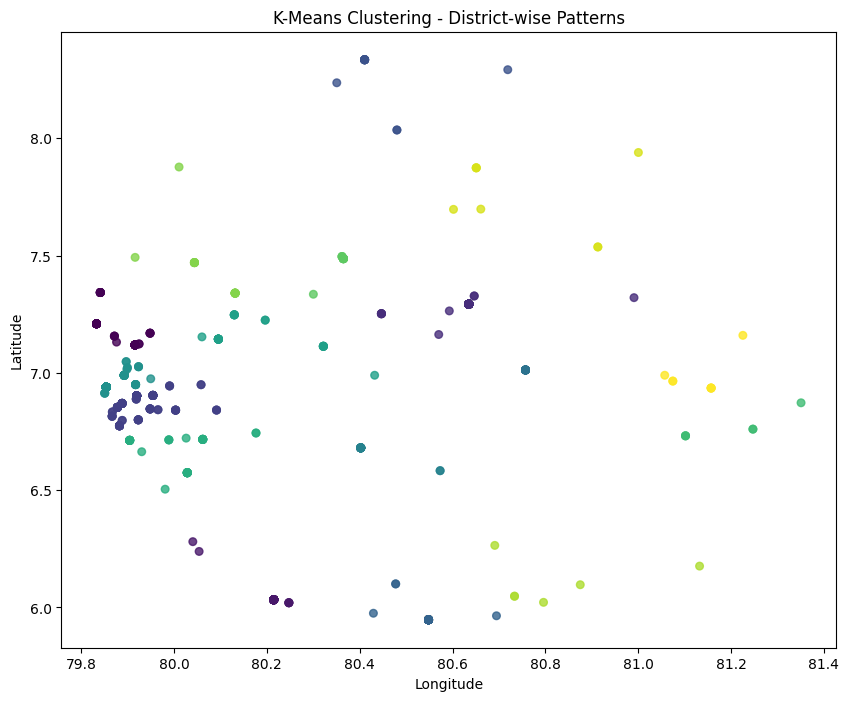

In [16]:
# Spacial Cluster Analysis for Districts
cluster_features = naadhagama_df[['latitude', 'longitude']]

# Set the number of clusters based on the number of distinct districts
num_clusters = len(naadhagama_df['user_district'].unique())

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
naadhagama_df['district_cluster'] = kmeans.fit_predict(cluster_features)

# Visualize the results on a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(naadhagama_df['longitude'], naadhagama_df['latitude'], c=naadhagama_df['district_cluster'], cmap='viridis', s=30, alpha=0.8)
plt.title('K-Means Clustering - District-wise Patterns')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Visualize the results on an interactive map
dist_cluster_map = px.scatter_mapbox(
    naadhagama_df,
    lat='latitude',
    lon='longitude',
    color='district_cluster',
    hover_name='user_district',
    mapbox_style="open-street-map",
    title='K-Means Clustering - District-wise Patterns'
)
dist_cluster_map.update_layout(
    mapbox_zoom=6, 
    mapbox_center_lat = 7.8731,
    height=800
)

dist_cluster_map.show()



<H3>District-wise Analysis of Naadhagama Posts</H3>

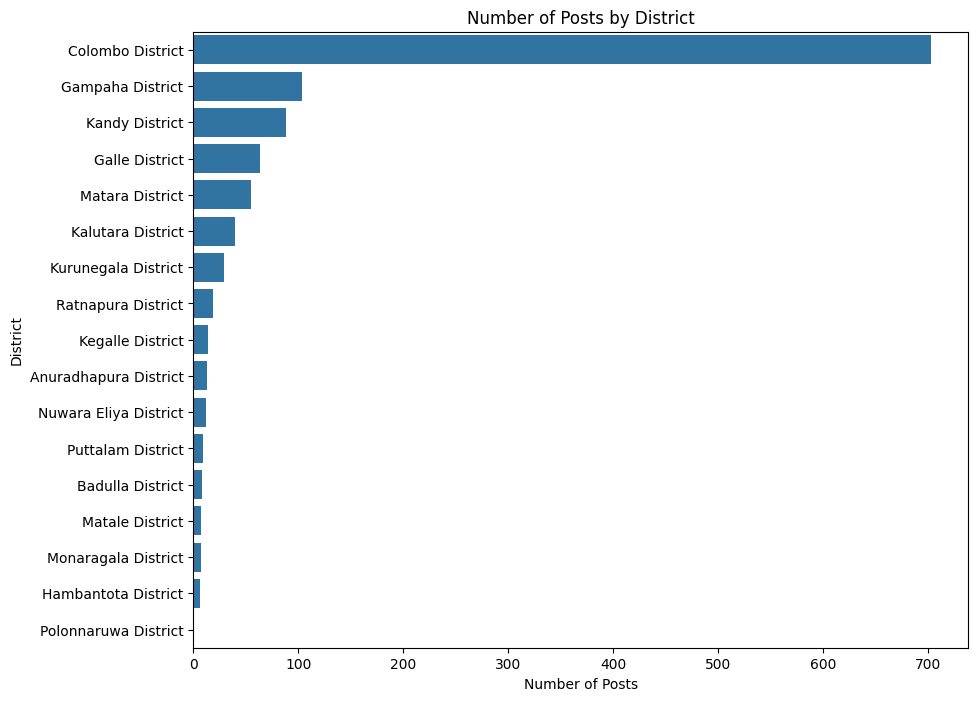

In [17]:
# Count the number of posts in each district
district_post_counts = naadhagama_df['user_district'].value_counts().reset_index()
district_post_counts.columns = ['District', 'Number of Posts']

# Plotting the bar chart
plt.figure(figsize=(10, 8))
sns.barplot(x='Number of Posts', y='District', data=district_post_counts)
plt.title('Number of Posts by District')
plt.xlabel('Number of Posts')
plt.ylabel('District')
plt.show()

<H3>District-wise Analysis of Naadhagama User Engagement</H3>

The user engagement analysis was conducted based on the Like and Comment counts.

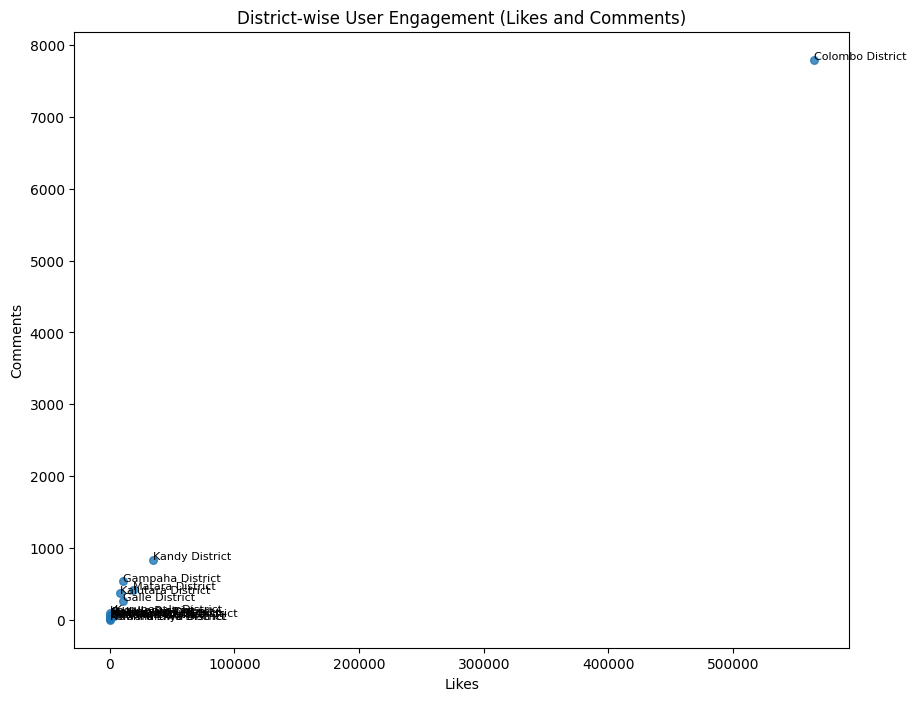

In [18]:
# District-wise engagement analysis

# Group by district and calculate the total likes and comments for each district
district_engagement = naadhagama_df.groupby('user_district').agg({'likes_count': 'sum', 'comments_count': 'sum'}).reset_index()

# Visualize the results on a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(district_engagement['likes_count'], district_engagement['comments_count'], s=30, alpha=0.8)
plt.title('District-wise User Engagement (Likes and Comments)')
plt.xlabel('Likes')
plt.ylabel('Comments')

# Add district names as labels
for i, row in district_engagement.iterrows():
    plt.text(row['likes_count'], row['comments_count'], row['user_district'], fontsize=8)

plt.show()


<H3>Temporal Analysis of Naadhagama Posts</H3>

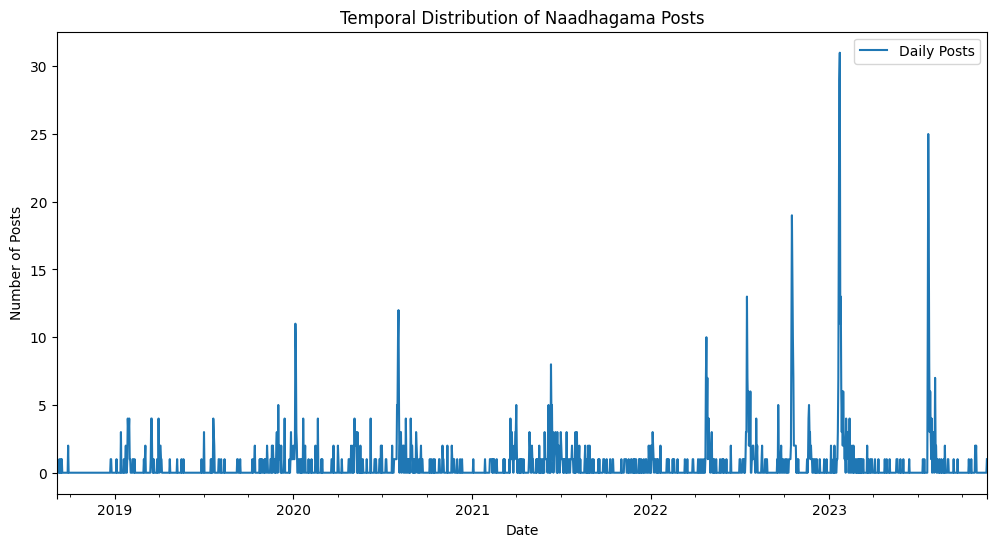

In [19]:
# Temporal Analysis for Posts

# Convert the timestamp column to datetime
naadhagama_df['timestamp'] = pd.to_datetime(naadhagama_df['timestamp'])

plt.figure(figsize=(12, 6))
naadhagama_df.set_index('timestamp')['post_id'].resample('D').count().plot(label='Daily Posts')
plt.title('Temporal Distribution of Naadhagama Posts')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.legend()
plt.show()

# Resample the data to daily frequency and count the number of posts
daily_posts = naadhagama_df.set_index('timestamp')['post_id'].resample('D').count()

# Create an interactive line plot using Plotly
temp_fig = px.line(daily_posts, x=daily_posts.index, y=daily_posts.values, labels={'x': 'Date', 'y': 'Number of Posts'})
temp_fig.update_layout(title='Temporal Distribution of Naadhagama Posts', xaxis_rangeslider_visible=True, height=800)
temp_fig.show()


<H3>Analysis of Posting Time Patterns</H3>

This analysis is performed to identify the peak posting times.

In [20]:
# Identify peak posting days and times

# Resample the data to daily frequency and count the number of posts
daily_post_counts = naadhagama_df.set_index('timestamp')['post_id'].resample('D').count()
peak_days = daily_post_counts[daily_post_counts == daily_post_counts.max()].index
print("Peak Posting Days:", peak_days)

# Visualize Daily Patterns with Heatmap 
hourly_post_counts = naadhagama_df.set_index('timestamp')
hourly_post_counts['day_of_week'] = hourly_post_counts.index.dayofweek
hourly_post_counts['hour_of_day'] = hourly_post_counts.index.hour
hourly_post_counts = hourly_post_counts.groupby(['day_of_week', 'hour_of_day']).size().unstack()

# Create an interactive heatmap using Plotly
post_time_fig = px.imshow(hourly_post_counts,
                        labels=dict(x="Hour of Day", y="Day of Week", color="Number of Posts"),
                        x=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', 
                           '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'],
                        y=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                        color_continuous_scale='viridis')

post_time_fig.update_layout(title='Hourly Distribution of Naadhgama Posts',
                          xaxis_title='Hour of Day',
                          yaxis_title='Day of Week',
                          height=800)

post_time_fig.show()


Peak Posting Days: DatetimeIndex(['2023-01-23 00:00:00+00:00'], dtype='datetime64[ns, UTC]', name='timestamp', freq='D')


<H2>Predictive Modeling</H2>

<H3>Predictive Analysis for Future Engagement of Fans</H3>

The historical monthly posts counts are considered  for forecasting people engagement for Naadhagama events in Year 2024.

ARIMA model is used for time series forecasting. 

Uses the statsmodels library, to provides a convenient implementation of ARIMA.

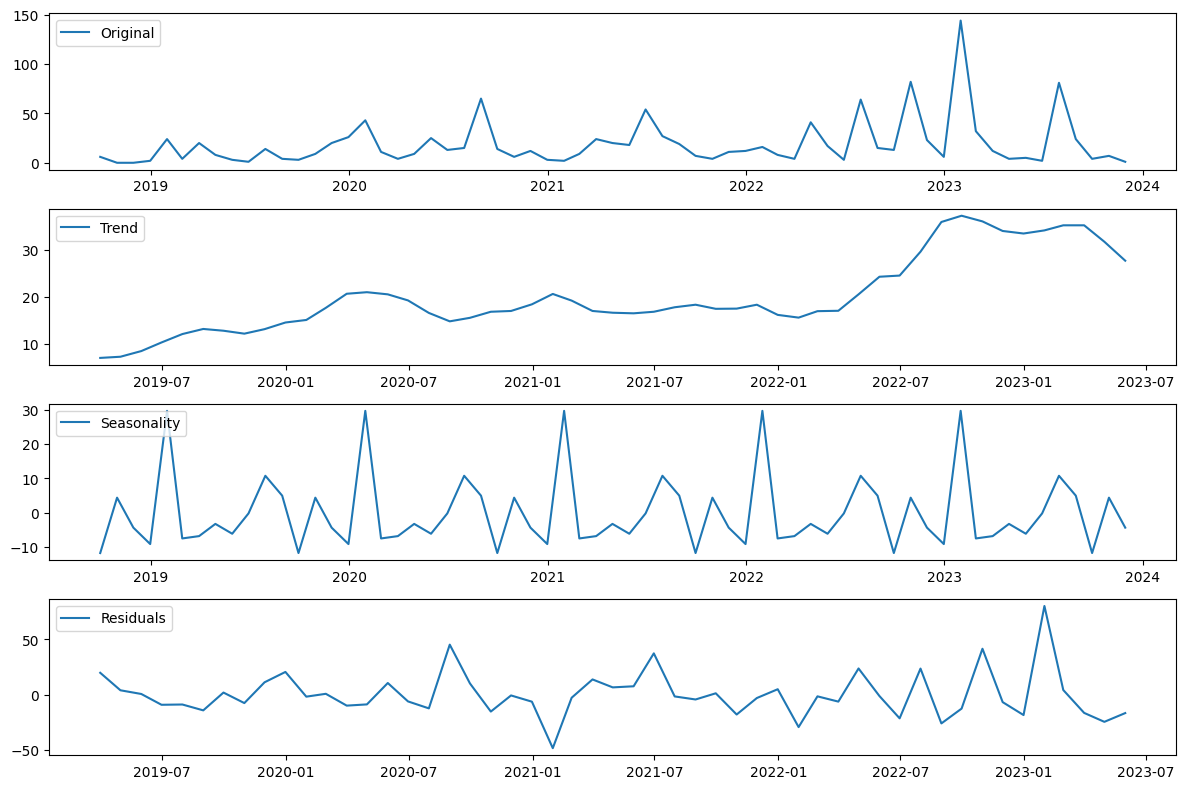

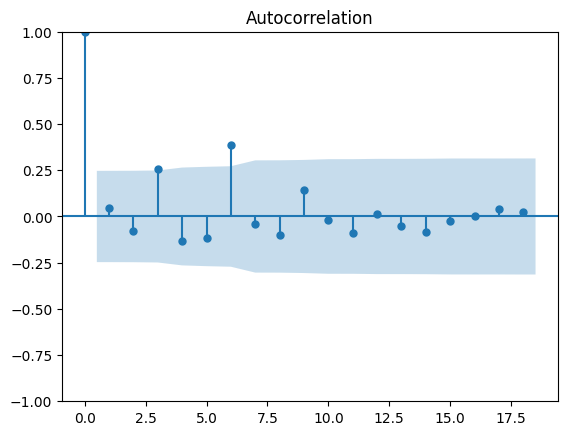

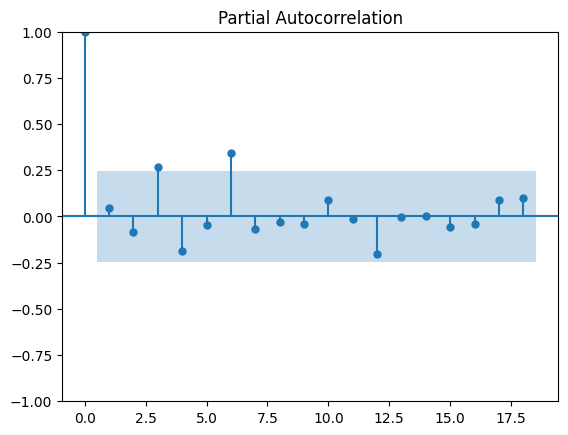

In [21]:
# Copy the DataFrame to a new DataFrame
naadhagama_forecast_df = naadhagama_df.copy()

naadhagama_forecast_df['timestamp'] = pd.to_datetime(naadhagama_forecast_df['timestamp'])
naadhagama_forecast_df.set_index('timestamp', inplace=True)

# Resample the data to monthly frequency and count the number of posts per month
monthly_post_count = naadhagama_forecast_df.resample('M').size()

# Decompose the time series into trend, seasonality, and residual components
component_decomposition = seasonal_decompose(monthly_post_count, model='additive', period=12)
naadhagama_trend = component_decomposition.trend
naadhagama_seasonal = component_decomposition.seasonal
naadhagama_residual = component_decomposition.resid

# Visualize the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(monthly_post_count, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(naadhagama_trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(naadhagama_seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(naadhagama_residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# ACF and PACF plots for identifying model parameters
plot_acf(monthly_post_count)
plot_pacf(monthly_post_count)
plt.show()


<H4>Prediction Model Development</H4>

The ARIMA (Autoregressive Integrated Moving Average) model is selected because it is suitable for time series forecasting, especially when dealing with temporal patterns and trends.

In [22]:
# Fit an ARIMA model to the data
order = (1, 1, 1)
model = ARIMA(monthly_post_count, order=order)
results = model.fit()

# Forecast for the year 2024 (12 months)
forecast_steps = 12  # Number of months to forecast
forecast = results.get_forecast(steps=forecast_steps)

# Get confidence intervals of forecasts
confidence_intervals = forecast.conf_int()
# Get column names from the confidence_intervals DataFrame 
lower_col = confidence_intervals.columns[0]
upper_col = confidence_intervals.columns[1]

# Create a figure with the actual and forecasted values
fig_forecast = go.Figure()
# Add the actual data
fig_forecast.add_trace(go.Scatter(x=monthly_post_count.index, y=monthly_post_count, name='Actual', mode='lines'))
# Add the forecasted data
fig_forecast.add_trace(go.Scatter(x=forecast.predicted_mean.index, y=forecast.predicted_mean, name='Forecast', mode='lines'))
# Add the confidence intervals 
fig_forecast.add_trace(go.Scatter(x=confidence_intervals.index, y=confidence_intervals[lower_col], 
                                  name='Lower Confidence Interval', mode='lines', fill=None))
fig_forecast.add_trace(go.Scatter(x=confidence_intervals.index, y=confidence_intervals[upper_col], 
                                  name='Upper Confidence Interval', mode='lines', fill='tonexty'))

# Customize the layout of the plot
fig_forecast.update_layout(title='Monthly Post Count Forecast for 2024',
                  xaxis_title='Time',
                  yaxis_title='Post Count',
                  legend=dict(x=0, y=1),
                  template='plotly_white',
                  height=800)
fig_forecast.show()

print(f"Forecasted post count for 2024: {forecast.predicted_mean.sum():.0f}")

Forecasted post count for 2024: 276


<H4>Model Evaluation</H4>

Mean Absolute Error (MAE), Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) methods used for model evaluation.

In [23]:
# Evaluate the model performance
actual_values = naadhagama_forecast_df.resample('M').size()

# Extract forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
# Ensure the lengths match
actual_values = actual_values[-forecast_steps:]

# Calculate evaluation metrics
mae = mean_absolute_error(actual_values, forecast_values)
mse = mean_squared_error(actual_values, forecast_values)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Mean Absolute Error (MAE): 27.66
Mean Squared Error (MSE): 1726.66
Root Mean Squared Error (RMSE): 41.55


<H2>Generate Email Notifications</H2>

<H3>Send a notification email if the forecasted post count is greater than 100 for 2024</H3>

Email notification is seend using the smtplib library along with the starttls method for a secure connection. 

Set Up Process:

- Add the sender's email address.
- Add the recievers email address.
- Add the google app password

To get the Google app password follow this process,

- Go to your (Google Account).
- On the left navigation panel, click Security.
- Enable a two factor authentication.
- Click the Two Factor Authentication and navigate into that page.
- Go to App passwords section.
- Create new App password.
- Copy the password and add into the code.

<b>I will keep the email notofocation send code section disabled because, it required above mentioned inputs to function, If not code will generate the error.</b> 

In [24]:
"""
# Your email and password (use an app password if you're using Gmail)
sender_email = "chanushakaushal1@gmail.com" # Replace with your email
app_password = "xfnq wspt wior bfpw" # Replace with your app password

# Recipient email
recipient_email = "chanushaonline@gmail.com" # Replace with recipient email

# SMTP server settings (use the correct settings for your email provider)
smtp_server = "smtp.gmail.com"
smtp_port = 587

# Initialize the SMTP server
server = smtplib.SMTP(smtp_server, smtp_port)
server.starttls()
server.login(sender_email, app_password)

#Get the forecasted post count for 2024
post_count = forecast.predicted_mean.sum().round()

# Check if forecast post_count > 100
if post_count > 100:
    # Compose the email message
    subject = "Post Count Notification"
    body = f"The post count is {post_count}, which exceeds 100. Please check."

    msg = MIMEMultipart()
    msg['From'] = sender_email
    msg['To'] = recipient_email
    msg['Subject'] = subject
    msg.attach(MIMEText(body, 'plain'))

    # Send the email
    server.sendmail(sender_email, recipient_email, msg.as_string())

    print("Email successfully sent!")

# Close the SMTP server connection
server.quit()
"""

'\n# Your email and password (use an app password if you\'re using Gmail)\nsender_email = "chanushakaushal1@gmail.com" # Replace with your email\napp_password = "xfnq wspt wior bfpw" # Replace with your app password\n\n# Recipient email\nrecipient_email = "chanushaonline@gmail.com" # Replace with recipient email\n\n# SMTP server settings (use the correct settings for your email provider)\nsmtp_server = "smtp.gmail.com"\nsmtp_port = 587\n\n# Initialize the SMTP server\nserver = smtplib.SMTP(smtp_server, smtp_port)\nserver.starttls()\nserver.login(sender_email, app_password)\n\n#Get the forecasted post count for 2024\npost_count = forecast.predicted_mean.sum().round()\n\n# Check if forecast post_count > 100\nif post_count > 100:\n    # Compose the email message\n    subject = "Post Count Notification"\n    body = f"The post count is {post_count}, which exceeds 100. Please check."\n\n    msg = MIMEMultipart()\n    msg[\'From\'] = sender_email\n    msg[\'To\'] = recipient_email\n    msg[\'

<H2>Create Dashboard for the Visualization</H2>

Ploty Library is used for creat the dashboard and visualize the outputs.

In [25]:
# Create the Dash app 
naadhagama_app = dash.Dash(__name__)

# Define the layout of the app 
naadhagama_app.layout = html.Div([
    # Add the logo to the app
    # html.Img(src='images/naadhagama_logo.jpeg', style={'width': '100%'}),

    # Add the title to the app
    html.H1('Geospatial Analysis of ℕ𝕒𝕒𝕕𝕙𝕒 𝔾𝕒𝕞𝕒 - නාද ගම Concert', style={'text-align': 'center'}),

    # Visualize the geo distribution of crowd
    html.H2('Geo Distribution of Naadhagama Crowd', style={'text-align': 'left'}),
    # Add the folium map to the app as an iframe
    html.Iframe(id='folium-map-01', srcDoc=geo_map._repr_html_(), width='100%', height='800px'),

    # Visualize the geo distribution of crowd engagement    
    html.H2('Geo Visualization of Crowd Engagement', style={'text-align': 'left'}),
    html.Iframe(id='folium-map-02', srcDoc=eng_map._repr_html_(), width='100%', height='800px'),

    # html.H2("Spatial Distribution of Naadhagama Instagram Posts"),
    # dcc.Graph(figure=insta_post_fig) 

    # Visualize the user engagement heatmap analysis   
    html.H2('HeatMp Analysis of User Engagement (Likes and Comments)', style={'text-align': 'left'}),
    html.Iframe(id='cmnt_likes_map', srcDoc=cmnt_likes_map._repr_html_(), width='100%', height='800px'),

    # Visualize the K-Means clustering results
    html.H2('K-Means Spatial Cluster Analysis - District-wise Patterns', style={'text-align': 'left'}),
    html.Iframe(id='dist_cluster_map', srcDoc=dist_cluster_map._repr_html_(), width='100%', height='800px'),

    # Visualize the number of posts by district
    html.H2("Naadhagama Concert Instagram Posts by District", style={'text-align': 'left'}),
    dcc.Graph(
        figure=px.bar(district_post_counts, x='District', y='Number of Posts', title='Number of Posts by District'),
    ),

    # Visualize the district-wise engagement analysis
    html.H2("Naadhagama Concert District-wise User Engagement", style={'text-align': 'left'}),
    dcc.Graph(
        figure=px.bar(
            district_engagement,
            x='user_district',
            y=['likes_count', 'comments_count'],
            barmode='group',
            labels={'userDistrict': 'District', 'value': 'Engagement Count'},
            title='Engagement Levels by District',
        ),
    ),

    # Visualize the temporal distribution of posts
    html.H2('Temporal Analysis of Naadhagama Posts', style={'text-align': 'left'}),
    html.Iframe(id='temp_fig', srcDoc=temp_fig._repr_html_(), width='100%', height='800px'),

    # Visualize the Post Time Analysis
    html.H2('Analysis of Posting Time Patterns', style={'text-align': 'left'}),
    html.Iframe(id='post_time_fig', srcDoc=post_time_fig._repr_html_(), width='100%', height='800px'),

    # Visualize the Predictive Analysis of Monthly Posting for 2024
    html.H2('Predictive Analysis for Future Engagement of Fans', style={'text-align': 'left'}),
    html.Iframe(id='fig_forecast', srcDoc=fig_forecast._repr_html_(), width='100%', height='800px'),


])

# Run the app on the web browser
if __name__ == '__main__':
    naadhagama_app.run_server(debug=True)

